In [1]:
import os, sys 
from pathlib import Path
from os.path import dirname, realpath
script_dir = Path(dirname(realpath('.')))
module_dir = str(script_dir)
sys.path.insert(0, module_dir + '/modules')
import numpy as np
import utility as ut
import matplotlib.pyplot as plt
import pandas as pd
import warnings
from scipy import stats
import seaborn as sns
import eulerN as arch 
import torch
from torch import nn
# warnings.filterwarnings('ignore')

In [2]:
N = 20000
dtype = 'float64'
Uo1 = torch.tensor(np.load('../data/L63-trajectories/train1.npy')[:N].astype('float64'))
Uo2 = torch.tensor(np.load('../data/L63-trajectories/train2.npy')[:N].astype('float64'))
Uo3 = torch.tensor(np.load('../data/L63-trajectories/train3.npy')[:N].astype('float64'))
Uo4 = torch.tensor(np.load('../data/L63-trajectories/train4.npy')[:N].astype('float64'))
Uo5 = torch.tensor(np.load('../data/L63-trajectories/train5.npy')[:N].astype('float64'))
Uo6 = torch.tensor(np.load('../data/L63-trajectories/train6.npy')[:N].astype('float64'))
Uo7 = torch.tensor(np.load('../data/L63-trajectories/train7.npy')[:N].astype('float64'))
Uo8 = torch.tensor(np.load('../data/L63-trajectories/train8.npy')[:N].astype('float64'))
Uo9 = torch.tensor(np.load('../data/L63-trajectories/train9.npy')[:N].astype('float64'))
Uo10 = torch.tensor(np.load('../data/L63-trajectories/train10.npy')[:N].astype('float64'))

Vo = torch.tensor(np.load('../data/L63-trajectories/test.npy').astype('float64'))
L0, L1 = 0.25, 5
D, D_r, B = 3, 512, 2
beta = 6e-7
m = 500

Time taken by set_stats is 0.0034 seconds
Time taken by set_stats is 0.0015 seconds
Time taken by sample_vec is 0.0022 seconds
torch.Size([4096, 4]) torch.Size([3, 199999]) torch.Size([3, 199999]) torch.Size([4096, 199999])
Time taken by compute_W is 27.4066 seconds
Time taken by learn is 27.4145 seconds
Time taken by compute_tau_f is 5.6135 seconds


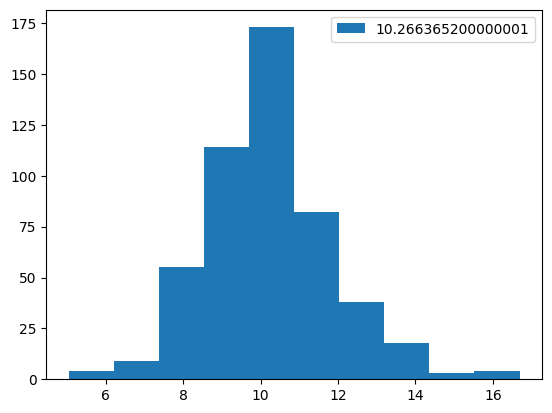

In [5]:
B = 1
rf1 = arch.DeepRF(4096, B, L0, L1, Uo1, beta, name='rf', save_folder=f'../data/EulerN/depth-{B}')
rf1.learn(Uo1, 42)
tau1 = rf1.compute_tau_f(Vo[0:m])
plt.hist(tau1[1], label=f'{tau1[1].mean()}')
plt.legend()

In [4]:
B = 2
rf2 = arch.DeepRF(D_r, B, L0, L1, Uo2, beta, name='rf', save_folder=f'../data/EulerN/depth-{B}')
rf2.init()
tau2 = rf2.compute_tau_f_(Vo[0:m])
del rf2

Time taken by init is 1.0036 seconds
Time taken by compute_tau_f_ is 16.6974 seconds


In [26]:
B = 3
rf3 = arch.DeepRF(D_r, B, L0, L1, Uo3, beta, name='rf', save_folder=f'../data/EulerN/depth-{B}')
rf3.init()
tau3 = rf3.compute_tau_f(Vo[0:m])
del rf3

Time taken by init is 1.4833 seconds
Time taken by compute_tau_f_ is 22.8859 seconds


In [5]:
B = 4
rf4 = arch.DeepRF(D_r, B, L0, L1, Uo4, beta, name='rf', save_folder=f'../data/EulerN/depth-{B}')
rf4.init()
tau4 = rf4.compute_tau_f(Vo[0:m])
del rf4

Time taken by init is 1.9679 seconds
Time taken by compute_tau_f_ is 29.7348 seconds


In [7]:
B = 6
rf6 = arch.DeepRF(D_r, B, L0, L1, Uo6, beta, name='rf', save_folder=f'../data/EulerN/depth-{B}')
rf6.init()
tau6 = rf6.compute_tau_f(Vo[0:m])
del rf6

Time taken by sample is 0.0024 seconds
Time taken by sample is 0.0050 seconds
Time taken by sample is 0.0024 seconds
Time taken by sample is 0.0025 seconds
Time taken by sample is 0.0024 seconds
Time taken by sample is 0.0024 seconds
Time taken by compute_tau_f_ is 26.6067 seconds


In [4]:
B = 10
rf10 = arch.DeepRF(D_r, B, L0, L1, Uo10, beta, name='rf', save_folder=f'../data/EulerN/depth-{B}')
rf10.init()
tau10 = rf10.compute_tau_f(Vo[0:m])

Time taken by compute_tau_f_ is 56.3095 seconds


Text(0.5, 1.0, '$\\tau_f$, architecture=EulerN, $D_r$=512')

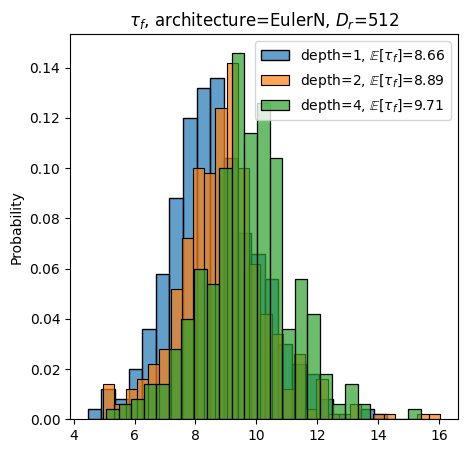

In [6]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
sns.histplot(tau1[1], ax=ax, label=r'depth=1, $\mathbb{E}[\tau_f]$'+f'={tau1[1].mean():.2f}', alpha=0.7, stat='probability')
sns.histplot(tau2[1], ax=ax, label=r'depth=2, $\mathbb{E}[\tau_f]$'+f'={tau2[1].mean():.2f}', alpha=0.7, stat='probability')
# sns.histplot(tau3[1], ax=ax, label=r'depth=3, $\mathbb{E}[\tau_f]$'+f'={tau3[1].mean():.2f}', alpha=0.7, stat='probability')
sns.histplot(tau4[1], ax=ax, label=r'depth=4, $\mathbb{E}[\tau_f]$'+f'={tau4[1].mean():.2f}', alpha=0.7, stat='probability')
# sns.histplot(tau5[1], ax=ax, label=r'depth=5, $\mathbb{E}[\tau_f]$'+f'={tau5[1].mean():.2f}', alpha=0.7, stat='probability')
# sns.histplot(tau6[1], ax=ax, label=r'depth=6, $\mathbb{E}[\tau_f]$'+f'={tau6[1].mean():.2f}', alpha=0.7, stat='probability')
# sns.histplot(tau10[1], ax=ax, label=r'depth=10, $\mathbb{E}[\tau_f]$'+f'={tau10[1].mean():.2f}', alpha=0.7, stat='probability')
ax.legend()
ax.set_title(fr'$\tau_f$, architecture=EulerN, $D_r$={D_r}')
# plt.savefig(f'../data/plots/eulerN-tau_f-D_r-{D_r}-single.png', bbox_inches='tight', dpi=300)

In [10]:
B = 5
rfu = arch.DeepRF(D_r, B, L0, L1, Uo10, 4e-7, name='rf', save_folder=f'../data/EulerN/depth-{B}')
rfu.init_uniform(limLeft=[-0.4, -0.4, -0.4, -4.], limRight=[0.4, 0.4, 0.4, 4.])
tauu = rfu.compute_tau_f_(Vo[0:m])

Time taken by compute_tau_f_ is 22.5672 seconds


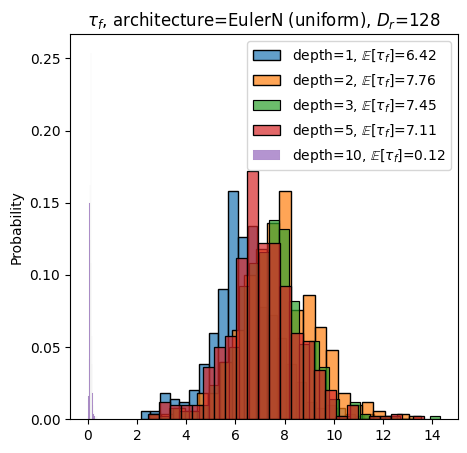

In [11]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
sns.histplot(tau1[1], ax=ax, label=r'depth=1, $\mathbb{E}[\tau_f]$'+f'={tau1[1].mean():.2f}', alpha=0.7, stat='probability')
sns.histplot(tau2[1], ax=ax, label=r'depth=2, $\mathbb{E}[\tau_f]$'+f'={tau2[1].mean():.2f}', alpha=0.7, stat='probability')
sns.histplot(tau3[1], ax=ax, label=r'depth=3, $\mathbb{E}[\tau_f]$'+f'={tau3[1].mean():.2f}', alpha=0.7, stat='probability')
# sns.histplot(tau4[1], ax=ax, label=r'depth=4, $\mathbb{E}[\tau_f]$'+f'={tau4[1].mean():.2f}', alpha=0.7, stat='probability')
sns.histplot(tau5[1], ax=ax, label=r'depth=5, $\mathbb{E}[\tau_f]$'+f'={tau5[1].mean():.2f}', alpha=0.7, stat='probability')
sns.histplot(tauu[1], ax=ax, label=r'depth=10, $\mathbb{E}[\tau_f]$'+f'={tauu[1].mean():.2f}', alpha=0.7, stat='probability')
ax.legend()
ax.set_title(fr'$\tau_f$, architecture=EulerN (uniform), $D_r$={D_r}')
plt.savefig(f'../data/plots/eulerN-tau_f-D_r-{D_r}-uniform.png', bbox_inches='tight', dpi=300)

In [49]:
B = 10
rf10 = arch.DeepRF(D_r, B, L0, L1, Uo10, beta, name='rf', save_folder=f'../data/EulerN/depth-{B}')
rf10.init()
tau10 = rf10.compute_tau_f_(Vo[0:m])

Time taken by sample is 0.0106 seconds
Time taken by sample is 0.0111 seconds
Time taken by sample is 0.0158 seconds
Time taken by sample is 0.0158 seconds
Time taken by sample is 0.0097 seconds
Time taken by sample is 0.0170 seconds
Time taken by sample is 0.0157 seconds
Time taken by sample is 0.0141 seconds
Time taken by sample is 0.0154 seconds
Time taken by sample is 0.0175 seconds
Time taken by compute_tau_f_ is 55.4127 seconds


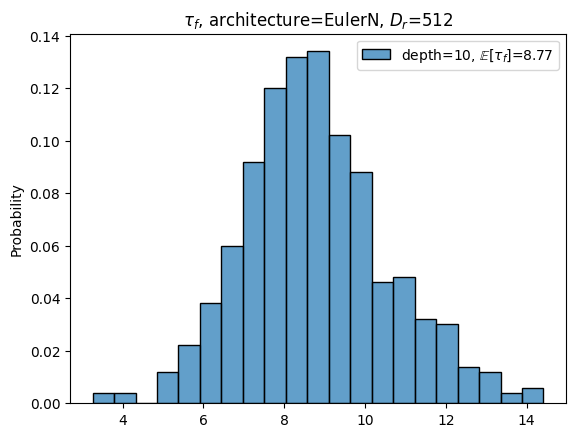

In [55]:
fig, ax = plt.subplots()
sns.histplot(tau10[1], ax=ax, label=r'depth=10, $\mathbb{E}[\tau_f]$'+f'={tau10[1].mean():.2f}', alpha=0.7, stat='probability')
ax.legend()
ax.set_title(fr'$\tau_f$, architecture=EulerN, $D_r$={D_r}')
plt.savefig(f'../data/plots/eulerN-tau_f-D_r-{D_r}-single.png', bbox_inches='tight', dpi=300)

TypeError: Dimensions of C (3, 500) should be one smaller than X(5000) and Y(3) while using shading='flat' see help(pcolormesh)

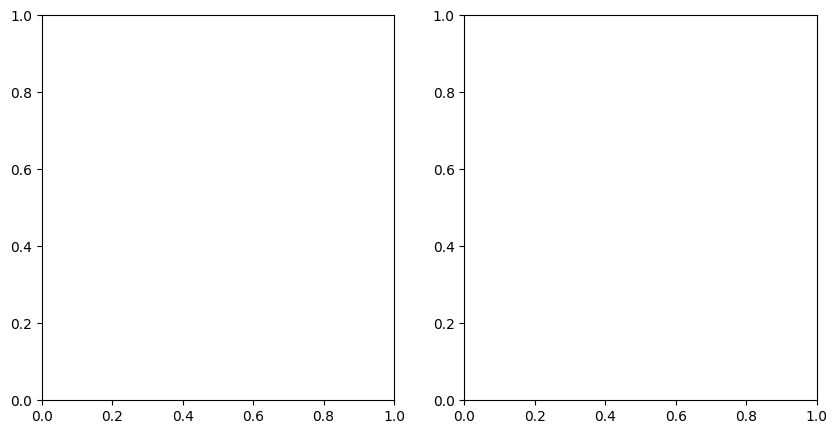

In [23]:
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

V = Vo[0, :, :500]

x = np.linspace(0, 500, Vo.shape[-1]) * 0.91 * 0.02
y = np.linspace(0, 40, Vo.shape[1])
X, Y = np.meshgrid(x, y)

V_hat = rf10.multistep_forecast(V[:, 0], 500)
ax1.pcolormesh(x, y, V_hat, cmap='viridis')


In [31]:
rf1.device

'mps'

In [20]:
np.random.seed(seed = 3)
a = np.random.uniform(size=3)
a

array([0.5507979 , 0.70814782, 0.29090474])

In [19]:
np.random.seed(seed = 3)
a = np.random.uniform(size=3)
a

array([0.5507979 , 0.70814782, 0.29090474])

In [14]:
import time
time.time()

1724645915.029161

In [4]:
import oneshot as sm
gs = sm.GoodRowSampler(0.4, 3.5, Uo1)
gs.sample(5, seed=4)

array([[ 8.83311304e-05,  2.88093063e-04,  2.91274092e-04,
         3.39779250e+00],
       [-7.62222215e-04, -3.29614288e-03, -4.38412889e-03,
         1.18424532e+00],
       [ 3.55161948e-04,  1.64317258e-04,  2.52009500e-05,
        -4.27856903e-01],
       [-1.56002916e-02,  9.84709291e-04, -1.08765677e-03,
         2.26230244e+00],
       [ 4.99472628e-03,  8.67239736e-03, -5.84500021e-03,
        -8.90492562e-01]])

In [7]:
gs.sample(5, seed=5)

array([[-2.14100283e-03, -6.08494591e-04,  3.96655208e-03,
        -1.08817883e+00],
       [ 4.18275445e-03,  5.64278084e-03,  2.63986086e-03,
         1.32008155e+00],
       [ 3.31422808e-04,  9.97778430e-04, -2.26288981e-05,
        -3.12780480e+00],
       [-1.32116290e-03,  8.62620396e-04, -2.55072497e-03,
        -4.75350341e-01],
       [ 5.59649365e-05, -7.38876226e-05,  3.80166966e-05,
         4.05090735e-01]])

In [18]:
a = [1, 3]
b = a.copy()
b[0] = 5
a, b

([1, 3], [5, 3])

In [19]:
a[:] = 3, 4

In [20]:
a

[3, 4]